In [3]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [5]:
# loading dataset from tensorflow 
#dataset --> fashion minist 
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()

In [7]:
# Pre-processing the dataset 
# The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.
# We normalize these values to a range of 0 to 1. This helps the neural network
# train more effectively.
train_images=train_images/255.0
test_images=test_images/255.0

In [9]:
# The labels are integers from 0 to 9. Let's create a list of human-readable
# names for these classes so we can understand the output later.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

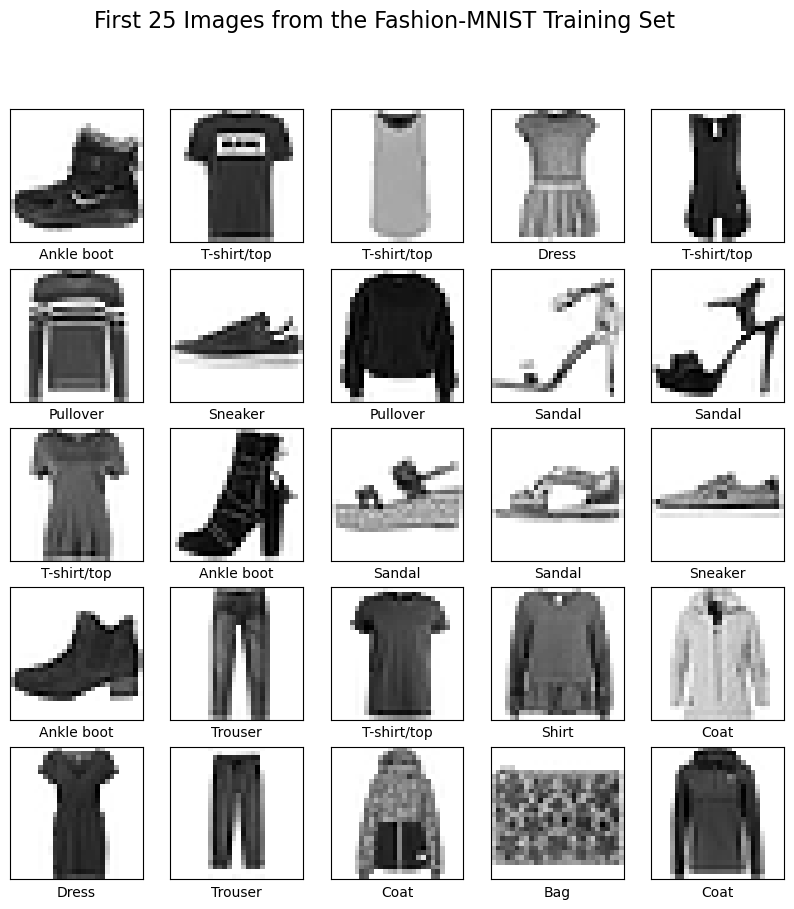

In [11]:
#Visualize the Data 
# It's always a good idea to look at your data before you start training models.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Display image in grayscale
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # Use the class_names list to show the correct label
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle("First 25 Images from the Fashion-MNIST Training Set", fontsize=16)
plt.show()

In [13]:
# --- 4. Print Shapes (for verification) ---
# This helps us confirm the structure of our data.
print("Shape of training images:", train_images.shape)
print("Number of training labels:", len(train_labels))
print("Shape of testing images:", test_images.shape)
print("Number of testing labels:", len(test_labels))

Shape of training images: (60000, 28, 28)
Number of training labels: 60000
Shape of testing images: (10000, 28, 28)
Number of testing labels: 10000


# Building CNN Model 

In [15]:
# Building CNN model 
model = tf.keras.Sequential([
    # This layer learns image features. 32 is the number of filters, (3,3) is the kernel size.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # This layer downsamples the image to reduce computation.
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Another convolutional layer to learn more complex features.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten the 2D feature maps into a 1D vector to feed into the dense layers.
    tf.keras.layers.Flatten(),
    # A standard fully-connected layer.
    tf.keras.layers.Dense(64, activation='relu'),
    # The final output layer. It has 10 neurons (one for each class) and uses
    # softmax to output a probability distribution over the classes.
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\mp599\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# --- 3. Compile the Model ---
# Before training, we need to configure the learning process.
model.compile(optimizer='adam', # Adam is an efficient and popular optimizer.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Good for multi-class classification.
              metrics=['accuracy']) # We want to monitor the accuracy during training.

In [19]:
# You can print a summary of the model to see its architecture.
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# --- 4. Train the Model ---
# Now we fit the model to our training data.
# An epoch is one full pass through the entire training dataset.
print("\n--- Starting Model Training ---")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
print("--- Model Training Finished ---\n")


--- Starting Model Training ---
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7606 - loss: 0.6577 - val_accuracy: 0.8628 - val_loss: 0.3730
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8805 - loss: 0.3290 - val_accuracy: 0.8860 - val_loss: 0.3235
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8984 - loss: 0.2776 - val_accuracy: 0.8957 - val_loss: 0.2940
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9121 - loss: 0.2441 - val_accuracy: 0.9015 - val_loss: 0.2785
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9205 - loss: 0.2128 - val_accuracy: 0.9039 - val_loss: 0.2715
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9302 - loss: 0.1891 - val_accuracy: 0.9035 - val_loss: 0.2654
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9374 - loss: 0.1670 - val_accuracy: 0.9071 - val_loss: 0.2600
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/

In [23]:
# --- 5. Evaluate the Model's Accuracy ---
# We check how the model performs on the test dataset, which it has never seen before.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy on clean data: {test_acc*100:.2f}%')


313/313 - 2s - 5ms/step - accuracy: 0.9095 - loss: 0.2874

Test accuracy on clean data: 90.95%


In [25]:
# --- 6. Save the Model ---
# We will need the trained model for our attack and for the deployment app.
model.save('fashion_mnist_cnn.h5')
print("\nModel saved to fashion_mnist_cnn.h5")


Model saved to fashion_mnist_cnn.h5


# Implement the Adversarial Attack (FGSM)

In [29]:
# Load the pre-trained model we saved in the previous step.
pretrained_model = tf.keras.models.load_model('fashion_mnist_cnn.h5')


In [31]:
# Load the test data again to select an image to attack.
(_, _), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
test_images = test_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [33]:
# Define the loss object. We need this to calculate the gradients.
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [35]:
# --- 2. Create the Adversarial Pattern Function ---
# This function is the core of the FGSM attack.
def create_adversarial_pattern(input_image, input_label):
    """
    Generates the perturbation pattern for an adversarial attack.
    
    Args:
        input_image: The original image tensor.
        input_label: The true label of the image.
        
    Returns:
        The signed gradient (perturbation pattern).
    """
    # We need to watch the input_image so we can calculate the gradient
    # of the loss with respect to it.
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradient of the loss with respect to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradient. This tells us the direction to
    # change each pixel to maximize the loss.
    signed_grad = tf.sign(gradient)
    return signed_grad

In [37]:
# --- 3. Perform the Attack on a Sample Image ---
# Let's select an image from the test set.
image_index = 0 # You can change this index to attack a different image!
original_image = test_images[image_index:image_index+1]
image_label = test_labels[image_index:image_index+1]

In [39]:
# Convert the NumPy image to a TensorFlow tensor.
original_image_tensor = tf.convert_to_tensor(original_image)

In [41]:
# Get the model's initial prediction on the clean image.
initial_pred_probs = pretrained_model.predict(original_image)
initial_pred_label_index = np.argmax(initial_pred_probs)
initial_pred_label = class_names[initial_pred_label_index]
print(f"Original Prediction: '{initial_pred_label}' with confidence {np.max(initial_pred_probs)*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Original Prediction: 'Ankle boot' with confidence 100.00%


In [45]:
#Generate the adversarial pattern.
perturbations = create_adversarial_pattern(original_image_tensor, image_label)

# Epsilon is the "strength" of the attack. Higher epsilon makes the
# attack more likely to succeed, but the changes to the image become more visible.
epsilon = 0.1
adversarial_image = original_image + epsilon * perturbations
# We clip the image values to stay in the [0,1] range.
adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)

In [47]:
# Get the model's prediction on the new, adversarial image.
adversarial_pred_probs = pretrained_model.predict(adversarial_image)
adversarial_pred_label_index = np.argmax(adversarial_pred_probs)
adversarial_pred_label = class_names[adversarial_pred_label_index]
print(f"Adversarial Prediction: '{adversarial_pred_label}' with confidence {np.max(adversarial_pred_probs)*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Adversarial Prediction: 'Sneaker' with confidence 99.36%


([], [])

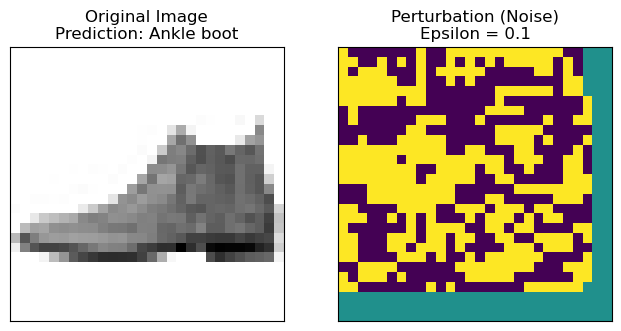

In [55]:
# --- 4. Visualize the Results ---
plt.figure(figsize=(12, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Original Image\nPrediction: {initial_pred_label}")
plt.xticks([])
plt.yticks([])

# Perturbation (the "noise" we added)
plt.subplot(1, 3, 2)
plt.imshow(perturbations.numpy().reshape(28, 28), cmap='viridis')
plt.title(f"Perturbation (Noise)\nEpsilon = {epsilon}")
plt.xticks([])
plt.yticks([])

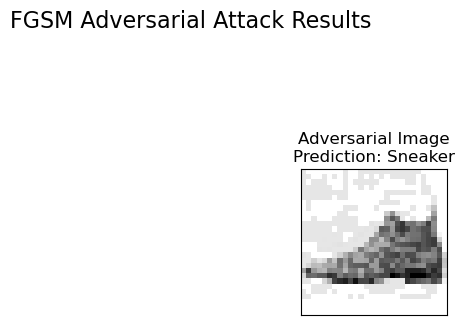

In [57]:
# Adversarial Image
plt.subplot(1, 3, 3)
plt.imshow(adversarial_image.numpy().reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Adversarial Image\nPrediction: {adversarial_pred_label}")
plt.xticks([])
plt.yticks([])

plt.suptitle("FGSM Adversarial Attack Results", fontsize=16)
plt.show()

# Evaluate Model on Full Adversarial Dataset

In [60]:
import time
# --- 1. Setup and Load Resources ---
# Load the pre-trained model and the test data.
print("Loading model and data...")
pretrained_model = tf.keras.models.load_model('fashion_mnist_cnn.h5')
(_, _), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
test_images = test_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()


Loading model and data...


In [62]:
# --- 2. Re-use the Adversarial Pattern Function ---
# This is the same function from the previous step.
def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

In [64]:
# --- 3. Generate the Full Adversarial Test Set ---
# This function will loop through all the test images and create
# their adversarial counterparts.

def generate_adversarial_dataset(dataset, labels, epsilon):
    """
    Generates an adversarial dataset from a given dataset.
    """
    print(f"\nGenerating adversarial dataset with epsilon = {epsilon}...")
    adversarial_examples = []
    start_time = time.time()
    
    # We process the dataset in a loop.
    # For large datasets, you might process in batches.
    for i in range(len(dataset)):
        image = dataset[i:i+1]
        label = labels[i:i+1]
        
        # Convert to tensor for gradient calculation
        image_tensor = tf.convert_to_tensor(image)
        
        perturbations = create_adversarial_pattern(image_tensor, label)
        adversarial_image = image_tensor + epsilon * perturbations
        adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)
        
        adversarial_examples.append(adversarial_image.numpy())
        
        # Print progress
        if (i + 1) % 1000 == 0:
            print(f"  Processed {i+1}/{len(dataset)} images...")

    end_time = time.time()
    print(f"Finished in {end_time - start_time:.2f} seconds.")
    
    # Stack the list of arrays into a single NumPy array
    return np.vstack(adversarial_examples)

In [66]:
# Set the attack strength
EPSILON = 0.1
adversarial_test_images = generate_adversarial_dataset(test_images, test_labels, EPSILON)


Generating adversarial dataset with epsilon = 0.1...
  Processed 1000/10000 images...
  Processed 2000/10000 images...
  Processed 3000/10000 images...
  Processed 4000/10000 images...
  Processed 5000/10000 images...
  Processed 6000/10000 images...
  Processed 7000/10000 images...
  Processed 8000/10000 images...
  Processed 9000/10000 images...
  Processed 10000/10000 images...
Finished in 122.64 seconds.


In [69]:
#--- 4. Evaluate and Compare Accuracy ---
# First, let's re-evaluate the accuracy on the clean, original data for a baseline.
print("\n--- Evaluating Model Performance ---")
clean_loss, clean_acc = pretrained_model.evaluate(test_images, test_labels, verbose=0)
print(f"Accuracy on CLEAN test data: {clean_acc * 100:.2f}%")



--- Evaluating Model Performance ---
Accuracy on CLEAN test data: 90.95%


In [73]:
# Now, evaluate the accuracy on the adversarial data.
adversarial_loss, adversarial_acc = pretrained_model.evaluate(adversarial_test_images, test_labels, verbose=0)
print(f"Accuracy on ADVERSARIAL test data (epsilon={EPSILON}): {adversarial_acc * 100:.2f}%")


Accuracy on ADVERSARIAL test data (epsilon=0.1): 14.39%


In [75]:
# Calculate the drop in accuracy
accuracy_drop = (clean_acc - adversarial_acc) * 100
print(f"\nAccuracy dropped by: {accuracy_drop:.2f}%")



Accuracy dropped by: 76.56%


# Train and Evaluate SVM & amp; KNN Models

In [78]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [80]:
# --- 2. Pre-process Data for scikit-learn ---
# SVM and KNN expect a 2D array where each row is a flattened sample.
# We need to reshape our 28x28 images into 1D vectors of 784 pixels.
num_train_samples = train_images.shape[0]
num_test_samples = test_images.shape[0]

In [84]:

# Flatten the images
# We use a subset of the training data to speed up the process, as SVM can be slow.
X_train = train_images.reshape(num_train_samples, -1)[:10000] # Using 10k samples for training
y_train = train_labels[:10000]

X_test_clean = test_images.reshape(num_test_samples, -1)
y_test = test_labels

In [86]:
# --- 3. Load the Adversarial Dataset (from the previous step) ---
# We need to regenerate the adversarial images as they are not saved to a file.
# Note: This part re-uses code from the previous step.
print("Re-generating adversarial dataset for testing...")
pretrained_model = tf.keras.models.load_model('fashion_mnist_cnn.h5')
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

# This function is simplified to generate the adversarial set without progress prints.
def generate_adversarial_dataset(dataset, labels, epsilon):
    adversarial_examples = []
    for i in range(len(dataset)):
        image_tensor = tf.convert_to_tensor(dataset[i:i+1])
        perturbations = create_adversarial_pattern(image_tensor, labels[i:i+1])
        adversarial_image = image_tensor + epsilon * perturbations
        adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)
        adversarial_examples.append(adversarial_image.numpy())
    return np.vstack(adversarial_examples)

EPSILON = 0.1
# The original test_images for the generator need to be 4D
adversarial_test_images_4d = generate_adversarial_dataset(test_images.reshape(-1, 28, 28, 1), test_labels, EPSILON)
X_test_adversarial = adversarial_test_images_4d.reshape(num_test_samples, -1) # Flatten for scikit-learn
print("Adversarial dataset ready.")


Re-generating adversarial dataset for testing...
Adversarial dataset ready.


In [88]:
# --- 4. Train and Evaluate SVM ---
print("\n--- Training Support Vector Machine (SVM) ---")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale') # Common SVM parameters
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
print(f"SVM training finished in {end_time - start_time:.2f} seconds.")



--- Training Support Vector Machine (SVM) ---
SVM training finished in 10.56 seconds.


In [90]:
# Evaluate SVM
svm_pred_clean = svm_model.predict(X_test_clean)
svm_acc_clean = accuracy_score(y_test, svm_pred_clean)
print(f"SVM Accuracy on CLEAN data: {svm_acc_clean * 100:.2f}%")

svm_pred_adv = svm_model.predict(X_test_adversarial)
svm_acc_adv = accuracy_score(y_test, svm_pred_adv)
print(f"SVM Accuracy on ADVERSARIAL data: {svm_acc_adv * 100:.2f}%")


SVM Accuracy on CLEAN data: 85.31%
SVM Accuracy on ADVERSARIAL data: 79.69%


# KNN model 

In [93]:
# --- 5. Train and Evaluate KNN ---
print("\n--- Training K-Nearest Neighbors (KNN) ---")
knn_model = KNeighborsClassifier(n_neighbors=5) # A common choice for k
start_time = time.time()
knn_model.fit(X_train, y_train)
end_time = time.time()
print(f"KNN training finished in {end_time - start_time:.2f} seconds.")



--- Training K-Nearest Neighbors (KNN) ---
KNN training finished in 0.01 seconds.


In [95]:
# Evaluate KNN
knn_pred_clean = knn_model.predict(X_test_clean)
knn_acc_clean = accuracy_score(y_test, knn_pred_clean)
print(f"KNN Accuracy on CLEAN data: {knn_acc_clean * 100:.2f}%")

knn_pred_adv = knn_model.predict(X_test_adversarial)
knn_acc_adv = accuracy_score(y_test, knn_pred_adv)
print(f"KNN Accuracy on ADVERSARIAL data: {knn_acc_adv * 100:.2f}%")


C:\Users\mp599\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mp599\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\mp599\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mp599\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\mp599\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

KNN Accuracy on CLEAN data: 81.79%
KNN Accuracy on ADVERSARIAL data: 78.96%
